<center><h3>WhatsApp Chat Analysis:</h3></center>

In [78]:
import re 
import pandas as pd 

In [79]:
f = open('WhatsApp Chat with CE Sem 7 Unofficial.txt', 'r', encoding = 'utf-8')

In [80]:
data = f.read()

In [81]:
print(data)

23/08/2022, 21:38 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
23/08/2022, 19:07 - +91 83202 68709 created group "CE Sem 7 Unofficial"
23/08/2022, 21:38 - +91 83202 68709 added you
23/08/2022, 21:39 - +91 70411 39593: Mare ek dought che
23/08/2022, 21:45 - +91 97129 16780 left
23/08/2022, 21:39 - +91 72289 36699: su?
23/08/2022, 21:39 - +91 70411 39593: Tme loko anime Kem nth jota
23/08/2022, 21:53 - +91 83202 68709 changed this group's settings to allow only admins to send messages to this group
23/08/2022, 21:40 - +91 97734 50547: jane tu solve karvano hoy
23/08/2022, 22:00 - +91 72028 23381 joined using this group's invite link
23/08/2022, 22:01 - +91 87808 86712 joined using this group's invite link
23/08/2022, 21:40 - +91 97734 50547: 😂
23/08/2022, 22:01 - +91 83202 68709 added +91 87350 00477
23/08/2022, 22:01 - +91 6352 097 227 joined using this group's invite link
23/08/2022, 21:40 

*Reguler expression of message*

In [82]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

* ***messages:***

In [83]:
messages = re.split(pattern, data) [1:] #if you get empty string at first 
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 83202 68709 created group "CE Sem 7 Unofficial"\n',
 '+91 83202 68709 added you\n',
 '+91 70411 39593: Mare ek dought che\n',
 '+91 97129 16780 left\n',
 '+91 72289 36699: su?\n',
 '+91 70411 39593: Tme loko anime Kem nth jota\n',
 "+91 83202 68709 changed this group's settings to allow only admins to send messages to this group\n",
 '+91 97734 50547: jane tu solve karvano hoy\n',
 "+91 72028 23381 joined using this group's invite link\n",
 "+91 87808 86712 joined using this group's invite link\n",
 '+91 97734 50547: 😂\n',
 '+91 83202 68709 added +91 87350 00477\n',
 "+91 6352 097 227 joined using this group's invite link\n",
 '+91 70411 39593: <Media omitted>\n',
 "+91 95100 38302 updated the message timer. New messages will disappear from this chat 24 hours after they're sent.\n",
 '+91 70468 67498: 😂😂😂\n',
 '+91 83202 68709 added +91

* ***dates:***

In [84]:
dates = re.findall(pattern, data)
dates

['23/08/2022, 21:38 - ',
 '23/08/2022, 19:07 - ',
 '23/08/2022, 21:38 - ',
 '23/08/2022, 21:39 - ',
 '23/08/2022, 21:45 - ',
 '23/08/2022, 21:39 - ',
 '23/08/2022, 21:39 - ',
 '23/08/2022, 21:53 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 22:00 - ',
 '23/08/2022, 22:01 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 22:01 - ',
 '23/08/2022, 22:01 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 22:02 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 22:12 - ',
 '23/08/2022, 22:15 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 22:22 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 21:40 - ',
 '23/08/2022, 21:41 - ',
 '23/08/2022, 21:41 - ',
 '23/08/2022, 21:41 - ',
 '23/08/2022, 21:41 - ',
 '23/08/2022, 21:41 - ',
 '23/08/2022, 21:42 - ',
 '23/08/2022, 21:42 - ',
 '23/08/2022, 21:42 - ',
 '23/08/2022, 21:42 - ',
 '23/08/2022, 21:43 - ',
 '23/08/2022, 21:43 - ',


In [85]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# convert message_date type into datetime
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-08-23 21:38:00
1,"+91 83202 68709 created group ""CE Sem 7 Unoffi...",2022-08-23 19:07:00
2,+91 83202 68709 added you\n,2022-08-23 21:38:00
3,+91 70411 39593: Mare ek dought che\n,2022-08-23 21:39:00
4,+91 97129 16780 left\n,2022-08-23 21:45:00


In [86]:
df.shape

(2298, 2)

In [87]:
# separate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2022-08-23 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-08-23 19:07:00,group_notification,"+91 83202 68709 created group ""CE Sem 7 Unoffi..."
2,2022-08-23 21:38:00,group_notification,+91 83202 68709 added you\n
3,2022-08-23 21:39:00,+91 70411 39593,Mare ek dought che\n
4,2022-08-23 21:45:00,group_notification,+91 97129 16780 left\n


***Extracting years***

In [88]:
df['year'] = df['date'].dt.year

In [89]:
df.head()

,date,user,message,year
0,2022-08-23 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-08-23 19:07:00,group_notification,"+91 83202 68709 created group ""CE Sem 7 Unoffi...",2022
2,2022-08-23 21:38:00,group_notification,+91 83202 68709 added you\n,2022
3,2022-08-23 21:39:00,+91 70411 39593,Mare ek dought che\n,2022
4,2022-08-23 21:45:00,group_notification,+91 97129 16780 left\n,2022


***Extracting months***

In [90]:
df['month'] = df['date'].dt.month_name()

***Extracting days***

In [91]:
df['day'] = df['date'].dt.day

***Extracting hours***

In [92]:
df['hour'] = df['date'].dt.hour

***Extracting minutes***

In [93]:
df['minute'] = df['date'].dt.minute

In [94]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-08-23 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,August,23,21,38
1,2022-08-23 19:07:00,group_notification,"+91 83202 68709 created group ""CE Sem 7 Unoffi...",2022,August,23,19,7
2,2022-08-23 21:38:00,group_notification,+91 83202 68709 added you\n,2022,August,23,21,38
3,2022-08-23 21:39:00,+91 70411 39593,Mare ek dought che\n,2022,August,23,21,39
4,2022-08-23 21:45:00,group_notification,+91 97129 16780 left\n,2022,August,23,21,45


In [95]:
# #code for converting into excel file
# # create excel writer object
# writer = pd.ExcelWriter('whatsapp_chat.xlsx')
# # write dataframe to excel
# df.to_excel(writer)
# # save the excel
# writer.save()
# print('DataFrame is written successfully to Excel File.')

In [96]:
#It shows how many messages 𝐃𝐡𝐢𝐫𝐚𝐣 𝐒𝐚𝐡𝐚𝐧𝐢 has sent at 0th index, I have used it fetch_stats function else part
df[df['user'] == "𝐃𝐡𝐢𝐫𝐚𝐣 𝐒𝐚𝐡𝐚𝐧𝐢"].shape

(5, 8)

In [97]:
words = []
for message in df['message']:
    words.extend(message.split())

In [98]:
len(words)

13833

In [99]:
# For extracting the url in lists:
from  urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("https://gtu.ac.in/registration1.aspx\n")
urls

['https://gtu.ac.in/registration1.aspx']

In [100]:
#extracting links into lists from message:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [101]:
#printing the numbers of links:
len(links)

40

In [102]:
df

,date,user,message,year,month,day,hour,minute
0,2022-08-23 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,August,23,21,38
1,2022-08-23 19:07:00,group_notification,"+91 83202 68709 created group ""CE Sem 7 Unoffi...",2022,August,23,19,7
2,2022-08-23 21:38:00,group_notification,+91 83202 68709 added you\n,2022,August,23,21,38
3,2022-08-23 21:39:00,+91 70411 39593,Mare ek dought che\n,2022,August,23,21,39
4,2022-08-23 21:45:00,group_notification,+91 97129 16780 left\n,2022,August,23,21,45
...,...,...,...,...,...,...,...,...
2293,2023-02-20 16:58:00,+91 92657 06264,<Media omitted>\n,2023,February,20,16,58
2294,2023-02-20 17:02:00,+91 84900 70745,<Media omitted>\n,2023,February,20,17,2
2295,2023-02-20 17:15:00,+91 73594 13156,<Media omitted>\n,2023,February,20,17,15
2296,2023-02-20 17:16:00,+91 97734 50547,task patavo task aa badhu karya karta `😂\n,2023,February,20,17,16


**most_busy_users:**

In [103]:
x = df['user'].value_counts().head()

In [104]:
import matplotlib.pyplot as plt
# For Dark mode style:
plt.style.use('dark_background')

In [105]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, '+91 98252 99818'),
  Text(1, 0, '+91 97734 50547'),
  Text(2, 0, '+91 73594 13156'),
  Text(3, 0, 'group_notification'),
  Text(4, 0, '+91 81418 14324')])

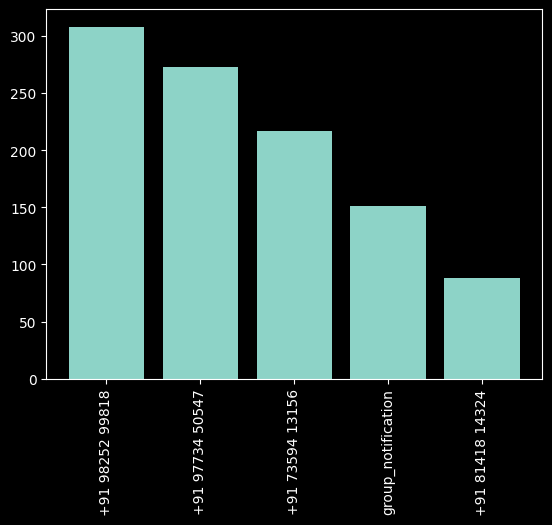

In [106]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')

In [107]:
round((df['user'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,+91 98252 99818,13.40
1,+91 97734 50547,11.88
2,+91 73594 13156,9.44
3,group_notification,6.57
4,+91 81418 14324,3.83
...,...,...
123,+91 81282 55830,0.04
124,+91 85116 30051,0.04
125,+91 74868 35716,0.04
126,Kanti-LJ,0.04


In [108]:
words = []

for message in df['message']:
    words.extend(message.split())

In [109]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,to,350
1,<Media,326
2,omitted>,326
3,che,220
4,ma,184
5,ne,169
6,+91,151
7,code,136
8,na,131
9,with,124


In [110]:
# remove group_notification:
temp = df[df['user'] != 'group_notification']
# remove <Media omitted>:
temp = temp[temp['message'] != '<Media omitted>\n']



In [111]:
f = open('stop_hinglish.txt')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [112]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    words.extend(message.split())

In [113]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,😂,244
1,to,225
2,che,220
3,ma,184
4,ne,169
5,chhe,140
6,na,131
7,deleted,118
8,message,116
9,j,115


***Emoji Analysis Section:***

In [114]:
%pip install emoji

In [115]:
import emoji

In [116]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [ ]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,355
1,🤣,86
2,😅,79
3,👍,20
4,🏻,14
...,...,...
79,🫣,1
80,🧐,1
81,👋,1
82,🙌,1


In [ ]:
df['month_num'] = df['date'].dt.month

In [ ]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [ ]:
timeline

,year,month_num,month,message
0,2022,8,August,103
1,2022,9,September,600
2,2022,10,October,210
3,2022,11,November,408
4,2022,12,December,387
5,2023,1,January,301
6,2023,2,February,289


In [ ]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [ ]:
timeline['time'] = time

In [ ]:
timeline

,year,month_num,month,message,time
0,2022,8,August,103,August-2022
1,2022,9,September,600,September-2022
2,2022,10,October,210,October-2022
3,2022,11,November,408,November-2022
4,2022,12,December,387,December-2022
5,2023,1,January,301,January-2023
6,2023,2,February,289,February-2023


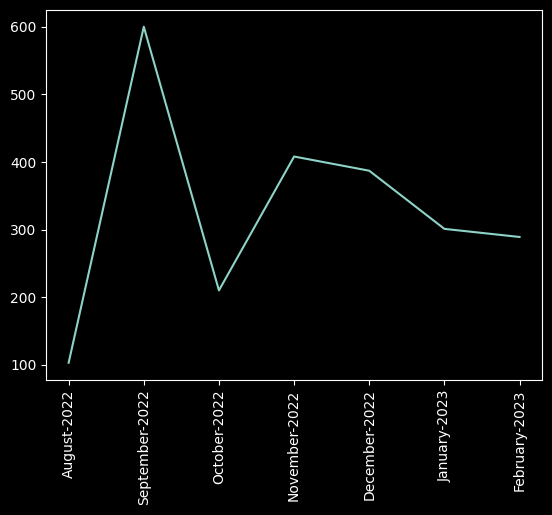

In [ ]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['only_date'] = df['date'].dt.date

In [ ]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

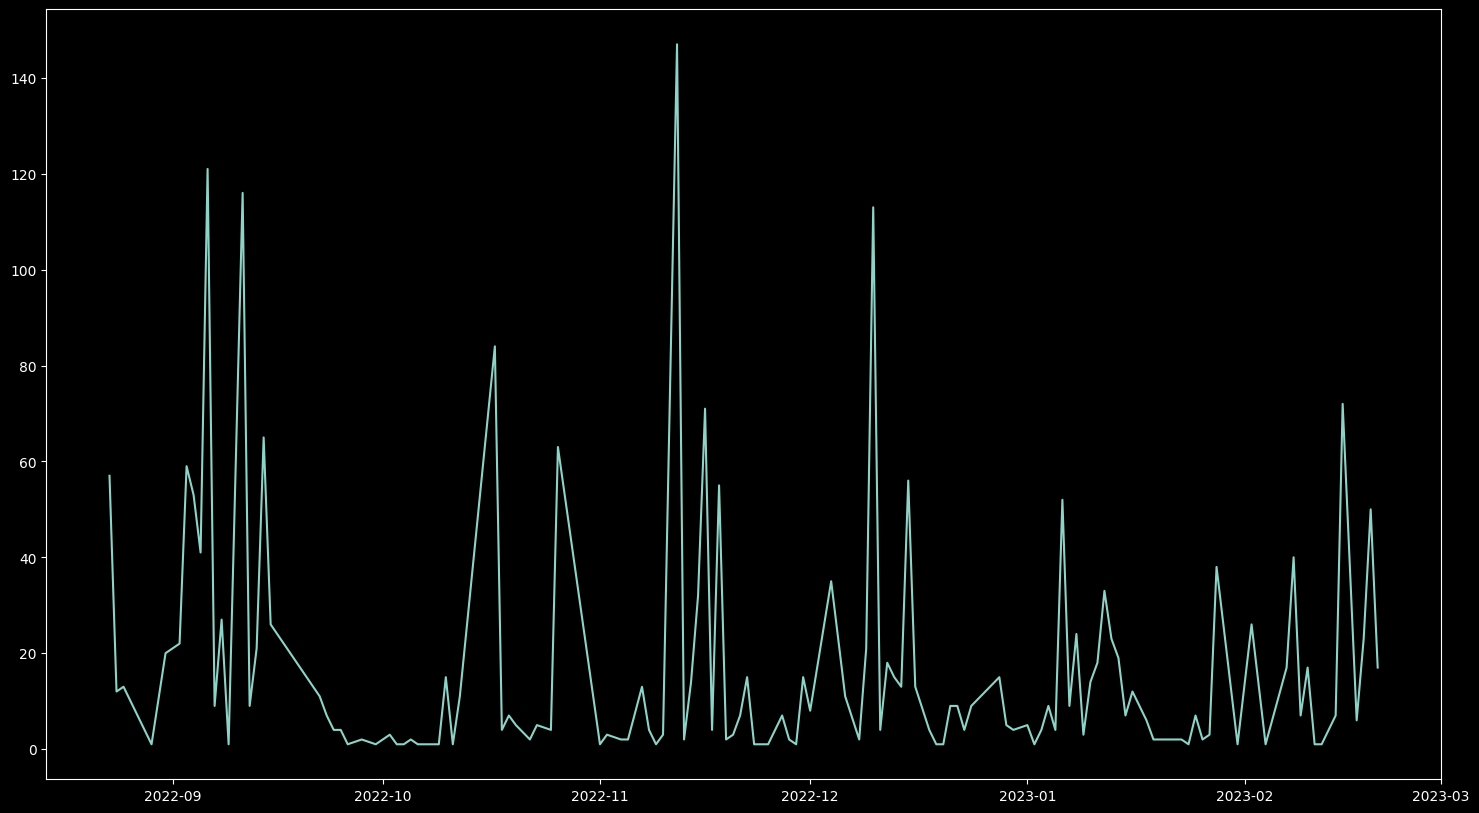

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [ ]:
df['day_name'] = df['date'].dt.day_name()

In [ ]:
df['day_name'].value_counts()

Wednesday    471
Saturday     431
Tuesday      333
Sunday       324
Friday       249
Monday       246
Thursday     244
Name: day_name, dtype: int64

In [ ]:
df['month'].value_counts()


September    600
November     408
December     387
January      301
February     289
October      210
August       103
Name: month, dtype: int64

In [ ]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

In [ ]:
df['period'] = period


In [ ]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
1797,2023-01-08 10:14:00,+91 97734 50547,story b muke che\n,2023,January,8,10,14,1,2023-01-08,Sunday,10-11
878,2022-10-26 11:05:00,+91 90993 15491,Happy new year 🎉\n,2022,October,26,11,5,10,2022-10-26,Wednesday,11-12
57,2022-08-24 06:58:00,group_notification,+91 92657 06264 joined using this group's invi...,2022,August,24,6,58,8,2022-08-24,Wednesday,6-7
1761,2023-01-06 18:23:00,+91 98252 99818,Tatva soft?\n,2023,January,6,18,23,1,2023-01-06,Friday,18-19
1721,2023-01-04 13:24:00,+91 97734 50547,or koi option bhi nahi hai janaab 😂\n,2023,January,4,13,24,1,2023-01-04,Wednesday,13-14


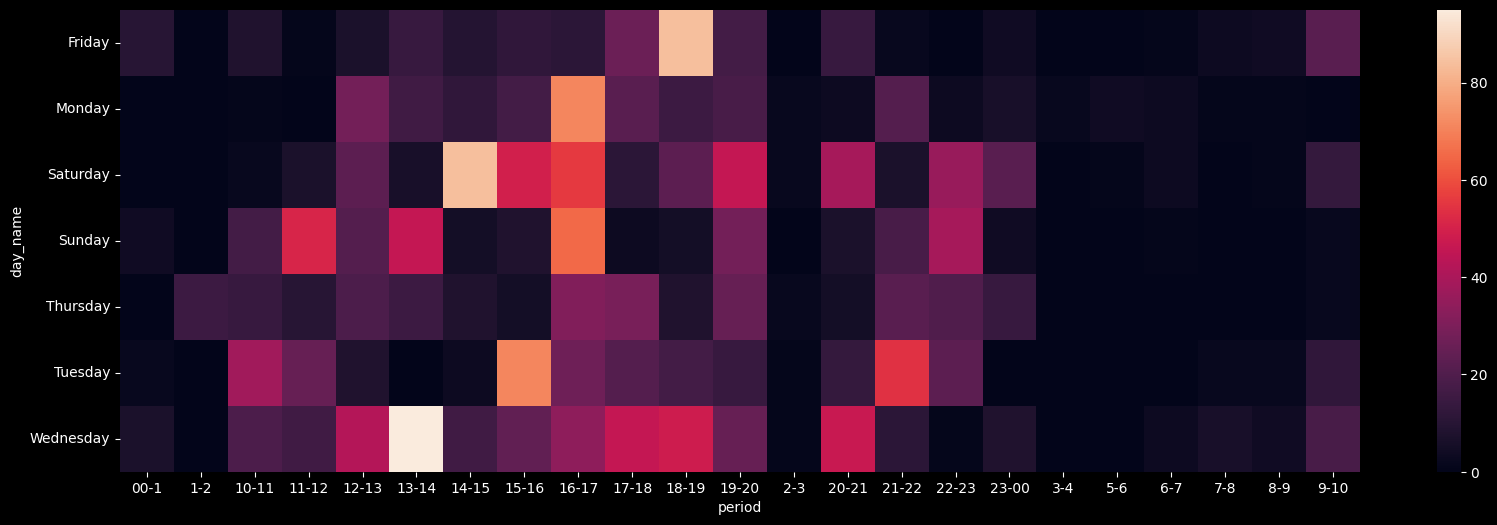

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.show()

In [ ]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-00,3-4,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,10.0,0.0,8.0,1.0,7.0,14.0,9.0,12.0,11.0,26.0,...,14.0,2.0,0.0,4.0,0.0,0.0,1.0,3.0,4.0,22.0
Monday,0.0,0.0,1.0,0.0,28.0,16.0,12.0,17.0,71.0,22.0,...,3.0,21.0,3.0,6.0,2.0,4.0,3.0,1.0,1.0,0.0
Saturday,0.0,0.0,2.0,7.0,23.0,6.0,84.0,49.0,56.0,11.0,...,39.0,7.0,36.0,22.0,0.0,1.0,3.0,0.0,1.0,13.0
Sunday,4.0,0.0,17.0,51.0,21.0,46.0,5.0,8.0,65.0,3.0,...,7.0,18.0,39.0,4.0,0.0,0.0,1.0,0.0,0.0,2.0
Thursday,0.0,15.0,14.0,10.0,19.0,15.0,8.0,5.0,31.0,29.0,...,5.0,22.0,20.0,14.0,0.0,0.0,0.0,0.0,0.0,2.0
Tuesday,2.0,0.0,38.0,25.0,8.0,0.0,3.0,71.0,27.0,21.0,...,13.0,54.0,23.0,0.0,0.0,0.0,0.0,2.0,2.0,12.0
Wednesday,7.0,0.0,19.0,16.0,42.0,95.0,16.0,24.0,34.0,46.0,...,47.0,11.0,1.0,8.0,0.0,0.0,3.0,6.0,4.0,18.0


**Message deleted:**

In [ ]:
message_deleted = df[df['message'] == 'This message was deleted\n']
message_deleted

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
39,2022-08-23 21:43:00,+91 70411 39593,This message was deleted\n,2022,August,23,21,43,8,2022-08-23,Tuesday,21-22
60,2022-08-24 10:10:00,+91 94265 41882,This message was deleted\n,2022,August,24,10,10,8,2022-08-24,Wednesday,10-11
70,2022-08-25 13:08:00,+91 99797 87319,This message was deleted\n,2022,August,25,13,8,8,2022-08-25,Thursday,13-14
83,2022-08-31 13:18:00,+91 83202 68709,This message was deleted\n,2022,August,31,13,18,8,2022-08-31,Wednesday,13-14
93,2022-08-31 14:06:00,+91 88499 52701,This message was deleted\n,2022,August,31,14,6,8,2022-08-31,Wednesday,14-15
101,2022-08-31 17:31:00,+91 6355 430 380,This message was deleted\n,2022,August,31,17,31,8,2022-08-31,Wednesday,17-18
256,2022-09-05 17:22:00,+91 97371 76505,This message was deleted\n,2022,September,5,17,22,9,2022-09-05,Monday,17-18
257,2022-09-05 17:22:00,+91 97371 76505,This message was deleted\n,2022,September,5,17,22,9,2022-09-05,Monday,17-18
296,2022-09-06 15:33:00,+91 94297 18400,This message was deleted\n,2022,September,6,15,33,9,2022-09-06,Tuesday,15-16
332,2022-09-06 15:40:00,+91 92656 10024,This message was deleted\n,2022,September,6,15,40,9,2022-09-06,Tuesday,15-16


In [ ]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)
df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [12]:
def happy_birthday():
    print("Happy Birthday\n" * 10)
    # return happy_birthday()

happy_birthday()

class Person:
  def __init__(slf, name, age, roll):
    slf.name = name
    slf.age = age
    slf.roll = roll

p1 = Person("John", 36, 4)
p2 = Person("Dhiraj", 22, 190320107100)

print(p1.name)
print(p1.age)
print(p1.roll)
# for i in happy_birthday():
#     print(i)

Happy Birthday
Happy Birthday
Happy Birthday
Happy Birthday
Happy Birthday
Happy Birthday
Happy Birthday
Happy Birthday
Happy Birthday
Happy Birthday

John
36
4
